# 数据分析——科比职业生涯的投篮

作为科比的球迷，即使科比退役了，但是还是时不时的会提到他，作为一代人的篮球偶像，科比影响了很多人的打球方式。上一次写了一篇也是科比的数据分析，不过重点是在得分上。这一次，让我们聚焦于进攻方式，用数据来呈现科比职业生涯的打球方式吧！然后来看看如何防守才能最大化阻碍科比的进攻！

和往常一样，第一步是导入数据，查看数据的基本情况.因为是篮球领域的数据，所以可能有一些小伙伴看不懂，不过没关系，后面如果有涉及到的维度，我都会进行简短的说明的。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv(r'F:\Python Workspace\kobe_data.csv')
data

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


In [2]:
data.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


可以看到，科比职业生涯出手投篮了三万多次，确实是厉害！大致先了解一下这份数据，主要是收集了科比每一次进攻的位置，投篮方式和得分，这三个维度也是我们重点关注的，其他的其实影响不是太大。另外，因为这是kaggle上的一个比赛数据，会用于预测，所以在“shot_made_flag”这一列上会有空值（即预测科比这一次投篮是否能投进），后面的部分分析会先剔除掉这些空值的数据，所以科密们，如果见到后面一些分析不太合理的话，要考虑到这一点哦！

In [3]:
#剔除未知命中结果的数据
known_data = data[data['shot_made_flag'].notnull()]
known_data

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10
10,Jump Shot,Jump Shot,309,20000012,33.8063,-94,238,-118.3638,1,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,11
11,Jump Shot,Jump Shot,4,20000019,33.9173,121,127,-118.1488,11,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,12


OK，那接下来就慢慢来分析科比的投篮吧。站在一个球迷的位置，我会先关注的是科比的投篮点，有哪一些进攻的方式，哪一种又是偏多呢？在数据分析前，我先来猜测下，按照我的球迷经验，科比常用的应该是跳投多一些，毕竟江湖上有一句话说，“我科后仰美如画”。科比的投篮姿势也是教科书版的存在，所以会有很多人去模仿他的动作。因为是偶像，所以忍不住会多说两句，如果介意的小伙伴，敬请理解。好了，让我们来看看结果吧！直接上代码：

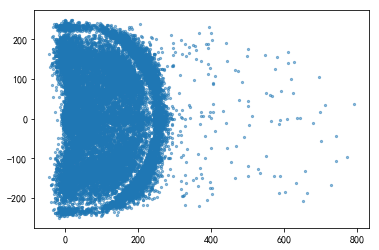

In [4]:
plt.rcParams['font.sans-serif']=['SimHei']     #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False      # 用来正常显示负号
#绘制投篮点
plt.scatter(known_data.loc_y, known_data.loc_x, s=5, alpha=.5)
plt.show()

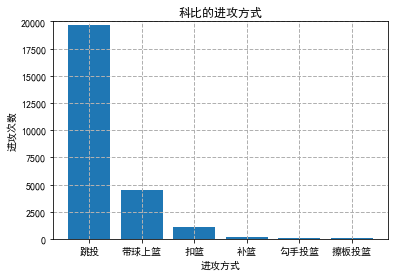

In [5]:
#常用的进攻方式
attack_method = known_data['combined_shot_type'].value_counts()
a=np.array([1,2,3,4,5,6])
plt.bar(a,attack_method,align='center')
plt.xlabel('进攻方式')
plt.ylabel('进攻次数')
plt.title('科比的进攻方式')
plt.grid(linestyle='--', linewidth=1)
plt.ylim(0,20000)
plt.xticks(a,('跳投','带球上篮','扣篮','补篮','勾手投篮','擦板投篮'))
plt.show()

哈哈哈，果然，跳投是最多的，最少的是擦板（嗯，这个让我想起了另外一位巨星——邓肯，他的擦板肯定不少！）这里用到的是“combined_shot_type”这一列，然后我把结果转为中文了，看起来顺眼一点。然后我们可以计算命中率（这里其实就不是很准确了，因为被我删除一部分数据），看看哪种进攻方式的命中率最高。

Bank Shot    0.791667
Dunk         0.928030
Hook Shot    0.535433
Jump Shot    0.391071
Layup        0.565093
Tip Shot     0.348684
Name: combined_shot_type, dtype: float64


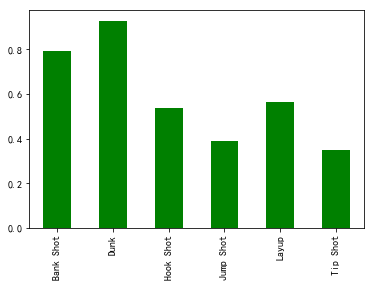

In [6]:
# 计算命中率
%matplotlib inline
#shot_made_flag：1表示进球，0表示投丢
#
hits = known_data[known_data['shot_made_flag']==1]['combined_shot_type'].value_counts()
hits = hits/attack_method
print(hits)
hits.plot.bar(color = 'g')

可以看到，扣篮的命中率最高（废话。。。），然后是擦板，带球上篮，勾手，跳投，最后居然是补篮命中率最低（有点难以置信，有可能是数据的缺失的原因，我其实更偏向跳投才是最低的）？

在数据集里的第一列，是投篮更加具体的方式，有兴趣的同学可以仿照上面的做法，看看科比哪一种进攻方式命中率最高。考虑到科密们津津乐道的“后仰跳投”，这里就只算下科比用后仰投篮的命中率（数据集细致地分为了后仰擦板，转身后仰等等，这里都统一起来）：

In [7]:
#后仰命中率
print(len(known_data[(known_data['action_type'].str.contains('Fadeaway')) & (known_data['shot_made_flag']==1)])/len(known_data[known_data['action_type'].str.contains('Fadeaway')]))

0.5841897233201581


看来唠嗑的后仰还真是不好防守呢！接着我们继续看看，除了进攻方式，科比每一节的命中率和两分球，三分球的命中率分别是多少，先来看看每一节的情况：

1    0.465672
2    0.448802
3    0.453442
4    0.413702
5    0.442857
6    0.466667
7    0.428571
Name: period, dtype: float64


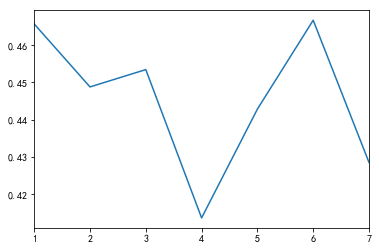

In [8]:
#每一节命中率情况
#period：表示在第几节出手投篮
period_accuracy = known_data[known_data['shot_made_flag']==1]['period'].value_counts() / known_data['period'].value_counts()
print(period_accuracy)
period_accuracy.plot()

从折线的走势可以看出，第一节平均命中率最高，然后经过第二节下降一点，第三节回来又有所上升，最后一节命中率最低。一般来说，是因为体力和技战术的问题，第三节会比第二节高是因为有一个中场休息，球员可以得到更多的休息和调整的时间，而打到最后一节，体力肯定没有之前好，所以命中率最低。另外对手也会根据你的表现而调整防守策略。这也符合大多数球员的情况吧。最后的5,6,7是加时赛，也可以看出，科比职业生涯打过的最长比赛是经历了三个加时赛。（注意：这里看起来变动幅度很大，如果你仔细看下右边的刻度，会发现什么？最低的第四节其实也就0.41左右！这也提示了我们，在可视化的时候，不同的刻度会给人不同的视觉效果！）

In [9]:
#两分球和三分球命中率
point_accuracy = known_data[known_data['shot_made_flag']==1]['shot_type'].value_counts() / known_data['shot_type'].value_counts()
point_accuracy

2PT Field Goal    0.477348
3PT Field Goal    0.329268
Name: shot_type, dtype: float64

如此看来，科比的三分球有三成多的命中率，相对来说还是可以的（查了一下，进不了前100，目前最高有47%的命中率）。这里可以给出一个防守建议，适当放科比投三分。其实这个还算合理，结合科比打球的时代，人们更偏向于内线和防守，投三分求其实不会太多。所以可以放出一点空间，避免贴身防守太紧被科比直接突破。

分析完科比的进攻方式，再来看看他喜欢在哪一些地方投篮，终结的效果又是如何。同样，数据集里面对投篮区域的描述也有两列，这里我选取描述更具体的“shot_zone_basic”一列来分析。

先来看看他在不同区域的出手情况：

Mid-Range                10532
Restricted Area           5932
Above the Break 3         4720
In The Paint (Non-RA)     3880
Right Corner 3             333
Left Corner 3              240
Backcourt                   60
Name: shot_zone_basic, dtype: int64


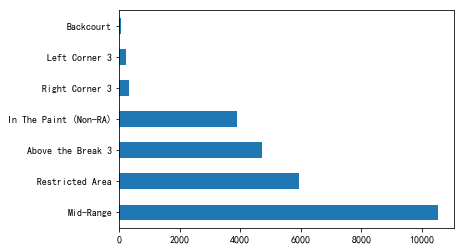

In [10]:
area = known_data['shot_zone_basic'].value_counts()
print(area)
area.plot.barh()

In [ ]:
可以看到，科比更多的进攻范围是在中距离，中投多一点。那命中率有如何呢？

Above the Break 3        0.329237
Backcourt                0.016667
In The Paint (Non-RA)    0.454381
Left Corner 3            0.370833
Mid-Range                0.406286
Restricted Area          0.618004
Right Corner 3           0.339339
Name: shot_zone_basic, dtype: float64


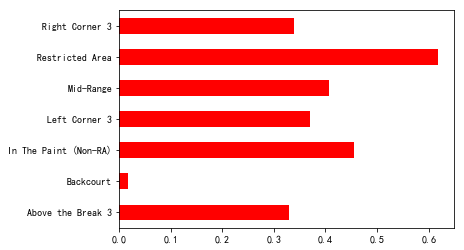

In [11]:
#区域命中率
area_accuracy = known_data[known_data['shot_made_flag']==1]['shot_zone_basic'].value_counts() / known_data['shot_zone_basic'].value_counts()
print(area_accuracy)
area_accuracy.plot.barh(color = 'r')

但是这样看似乎不太方便，究竟哪里是Mid-Range（中距离），哪里是In The Paint （油漆区）。那就换一种方式来可视化吧！

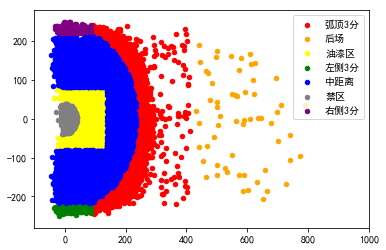

In [12]:
plt.figure()  
axes = plt.subplot(111)  

Above3_df = known_data[known_data['shot_zone_basic'] == 'Above the Break 3']
Backcourt_df = known_data[known_data['shot_zone_basic'] == 'Backcourt']
Paint_df = known_data[known_data['shot_zone_basic'] == 'In The Paint (Non-RA)']
Left3_df = known_data[known_data['shot_zone_basic'] == 'Left Corner 3']
Mid_Range_df = known_data[known_data['shot_zone_basic'] == 'Mid-Range']
Restricted_df = known_data[known_data['shot_zone_basic'] == 'Restricted Area']
Right3_df = known_data[known_data['shot_zone_basic'] == 'Right Corner 3']
       
type1 = axes.scatter(Above3_df['loc_y'], Above3_df['loc_x'], s=20,c='red')  
type2 = axes.scatter(Backcourt_df['loc_y'], Backcourt_df['loc_x'] ,s=20,c='orange')  
type3 = axes.scatter(Paint_df['loc_y'], Paint_df['loc_x'],s=20,c='yellow')  
type4 = axes.scatter(Left3_df['loc_y'], Left3_df['loc_x'], s=20,c='green') 
type5 = axes.scatter(Mid_Range_df['loc_y'], Mid_Range_df['loc_x'], s=20,c='blue') 
type6 = axes.scatter(Restricted_df['loc_y'], Restricted_df['loc_x'],s=20,c='gray') 
type7 = axes.scatter(Right3_df['loc_y'], Right3_df['loc_x'],s=20,c='purple') 
  
plt.legend((type1,type2,type3,type4,type5,type6,type7),
           ('弧顶3分', '后场', '油漆区','左侧3分','中距离','禁区','右侧3分')) 
plt.xlim((-100, 1000))
plt.show()  

这样就清楚很多了吧，再结合各区域的命中率，我们可以提出，尝试逼迫科比往右走，因为数据显示，他的右侧三分比左侧的命中率要低，并且不要让他轻易突破到禁区（灰色）和油漆区（黄色）投篮，可以在这里安排第二个甚至更多人去协防，让他往外走。当然了，其实篮球场上防守并没有想象中那样简单，还需要队友的配合。不过，对于科比来说，更可能的是，不管你多少人防守，我也不会传球，还是要硬上。。。没办法，谁让他是科比呢！

再来看看关键时刻的科比，这里我用了每一节最后的1分钟，来看看科比是如何尽显“杀手”本色的！

In [13]:
#选取最后一分钟的数据
last_min_df = known_data[known_data['minutes_remaining']==0]
last_min_df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
15,Jump Shot,Jump Shot,86,20000019,33.8523,62,192,-118.2078,0,1,...,2PT Field Goal,Center(C),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,16
27,Jump Shot,Jump Shot,369,20000019,33.8583,-183,186,-118.4528,0,3,...,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,28
31,Jump Shot,Jump Shot,499,20000019,34.0103,127,34,-118.1428,0,4,...,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,32
39,Jump Shot,Jump Shot,202,20000047,33.7723,-27,272,-118.2968,0,2,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,40
61,Layup Shot,Layup,232,20000049,33.9953,22,49,-118.2478,0,2,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,62
63,Driving Layup Shot,Layup,353,20000049,34.0233,56,21,-118.2138,0,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,64
64,Running Jump Shot,Jump Shot,369,20000049,34.0183,121,26,-118.1488,0,3,...,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-11-05,LAL vs. LAC,LAC,65
74,Jump Shot,Jump Shot,201,20000058,33.8543,167,190,-118.1028,0,2,...,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-11-07,LAL @ HOU,HOU,75
78,Jump Shot,Jump Shot,306,20000058,34.0023,-71,42,-118.3408,0,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-11-07,LAL @ HOU,HOU,79
81,Jump Shot,Jump Shot,425,20000058,33.8883,1,156,-118.2688,0,4,...,2PT Field Goal,Center(C),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-11-07,LAL @ HOU,HOU,82


In [14]:
#平均进攻距离
avg_dis = last_min_df['shot_distance'].mean()
avg_dis

16.148706896551722

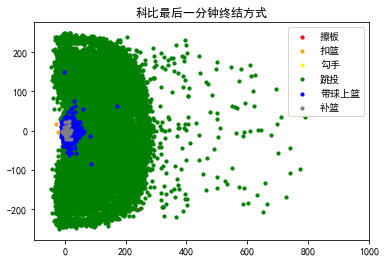

In [16]:
#进攻方式绘制
plt.figure()  
axes = plt.subplot(111)  

bank_shot_df = known_data[known_data['combined_shot_type'] == 'Bank Shot']
Dunk_df = known_data[known_data['combined_shot_type'] == 'Dunk']
hook_shot_df = known_data[known_data['combined_shot_type'] == 'Hook Shot']
junp_shot_df = known_data[known_data['combined_shot_type'] == 'Jump Shot']
layup_df = known_data[known_data['combined_shot_type'] == 'Layup']
tip_shot_df = known_data[known_data['combined_shot_type'] == 'Tip Shot']
       
type1 = axes.scatter(bank_shot_df['loc_y'], bank_shot_df['loc_x'], s=10,c='red')  
type2 = axes.scatter(Dunk_df['loc_y'], Dunk_df['loc_x'] ,s=10,c='orange')  
type3 = axes.scatter(hook_shot_df['loc_y'], hook_shot_df['loc_x'],s=10,c='yellow')  
type4 = axes.scatter(junp_shot_df['loc_y'], junp_shot_df['loc_x'], s=10,c='green') 
type5 = axes.scatter(layup_df['loc_y'], layup_df['loc_x'], s=10,c='blue') 
type6 = axes.scatter(tip_shot_df['loc_y'], tip_shot_df['loc_x'],s=10,c='gray') 

plt.title('科比最后一分钟终结方式')
plt.legend((type1,type2,type3,type4,type5,type6),
           ('擦板', '扣篮', '勾手','跳投','带球上篮','补篮')) 
plt.xlim((-100, 1000))
plt.show()  

可以看到，还是中距离的跳投居多，还有一些距离看起来很远的，一般都是时间快到点了，然后乱扔出去的。最为球队领袖，还是有很多出手权的。最后，这是一份很好可以用来练习的数据集，你可以用来练习pandas数据分析，matplotlib可视化，sklearn数据挖掘，希望大家可以学习和挖掘更多信息（科密们）！